<a href="https://colab.research.google.com/github/sftSalman/tensoflowMaster/blob/main/mulitiOutput_tensroflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

In [2]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2


def norm(x):
    return (x - train_stats['mean']) / train_stats['std']


def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()


In [3]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'

In [4]:
df = pd.read_excel(URL)

In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
df = df.sample(frac=1).reset_index(drop=True)

In [7]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.76,661.5,416.5,122.5,7.0,2,0.40,2,40.78,39.48
1,0.62,808.5,367.5,220.5,3.5,4,0.10,3,12.71,14.14
2,0.74,686.0,245.0,220.5,3.5,2,0.25,3,11.80,14.49
3,0.71,710.5,269.5,220.5,3.5,2,0.25,3,12.41,14.92
4,0.64,784.0,343.0,220.5,3.5,3,0.25,1,17.35,21.19


In [8]:
train,test = train_test_split(df,test_size=0.2)

In [9]:
train['X1']


192    0.76
741    0.64
663    0.64
746    0.98
210    0.79
       ... 
645    0.76
330    0.66
545    0.71
142    0.66
655    0.71
Name: X1, Length: 614, dtype: float64

In [10]:
test.shape

(154, 10)

In [11]:
train_state = train.describe()
train_state

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.763974,671.714984,319.298046,176.208469,5.267101,3.488599,0.233225,2.840391,22.479261,24.791173
std,0.105180,87.636346,44.024759,45.139148,1.751343,1.124704,0.134032,1.574863,10.133686,9.566772
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.010000,10.900000
25%,0.660000,612.500000,294.000000,122.500000,3.500000,2.000000,0.100000,1.250000,13.000000,15.785000
50%,0.760000,661.500000,318.500000,147.000000,7.000000,3.000000,0.250000,3.000000,19.270000,22.725000
75%,0.820000,759.500000,343.000000,220.500000,7.000000,5.000000,0.400000,4.000000,32.057500,33.362500
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,43.100000,48.030000


In [12]:
train_state.pop('Y1')

count    614.000000
mean      22.479261
std       10.133686
min        6.010000
25%       13.000000
50%       19.270000
75%       32.057500
max       43.100000
Name: Y1, dtype: float64

In [13]:
train_state.pop('Y2')

count    614.000000
mean      24.791173
std        9.566772
min       10.900000
25%       15.785000
50%       22.725000
75%       33.362500
max       48.030000
Name: Y2, dtype: float64

In [14]:
train_state= train_state.transpose()
train_state

,count,mean,std,min,25%,50%,75%,max
X1,614.0,0.763974,0.105180,0.62,0.66,0.76,0.82,0.98
X2,614.0,671.714984,87.636346,514.50,612.50,661.50,759.50,808.50
X3,614.0,319.298046,44.024759,245.00,294.00,318.50,343.00,416.50
X4,614.0,176.208469,45.139148,110.25,122.50,147.00,220.50,220.50
X5,614.0,5.267101,1.751343,3.50,3.50,7.00,7.00,7.00
X6,614.0,3.488599,1.124704,2.00,2.00,3.00,5.00,5.00
X7,614.0,0.233225,0.134032,0.00,0.10,0.25,0.40,0.40
X8,614.0,2.840391,1.574863,0.00,1.25,3.00,4.00,5.00


In [15]:
# Get the data from UCI dataset
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'

# Use pandas excel reader
df = pd.read_excel(URL)
df = df.sample(frac=1).reset_index(drop=True)

# Split the data into train and test with 80 train / 20 test
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()

# Get Y1 and Y2 as the 2 outputs and format them as np arrays
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

# Normalize the training and test data
norm_train_X = norm(train)
norm_test_X = norm(test)




In [37]:
# Define model layers.
input_layer = Input(shape=(len(train .columns),))
first_dense = Dense(units='128', activation='relu')(input_layer)
second_dense = Dense(units='128', activation='relu')(first_dense)

# Y1 output will be fed directly from the second dense
y1_output = Dense(units='1', name='y1_output')(second_dense)
third_dense = Dense(units='64', activation='relu')(second_dense)

# Y2 output will come via the third dense
y2_output = Dense(units='1', name='y2_output')(third_dense)

# Define the model with the input layer and a list of output layers
model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

print(model.summary())


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 8)]          0           []                               
                                                                                                  
 dense_30 (Dense)               (None, 128)          1152        ['input_11[0][0]']               
                                                                                                  
 dense_31 (Dense)               (None, 128)          16512       ['dense_30[0][0]']               
                                                                                                  
 dense_32 (Dense)               (None, 64)           8256        ['dense_31[0][0]']               
                                                                                            

In [39]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics = {'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                         'y2_output': tf.keras.metrics.RootMeanSquaredError()})

In [40]:
history = model.fit(norm_train_X, train_Y,
                    epochs=500, batch_size=10, validation_data=(norm_test_X, test_Y))

Epoch 1/500
62/62 [==============================] - 1s 6ms/step - loss: 284.3340 - y1_output_loss: 137.5669 - y2_output_loss: 146.7671 - y1_output_root_mean_squared_error: 11.7289 - y2_output_root_mean_squared_error: 12.1147 - val_loss: 34.2379 - val_y1_output_loss: 12.3518 - val_y2_output_loss: 21.8861 - val_y1_output_root_mean_squared_error: 3.5145 - val_y2_output_root_mean_squared_error: 4.6783
Epoch 2/500
62/62 [==============================] - 0s 3ms/step - loss: 29.9960 - y1_output_loss: 12.3004 - y2_output_loss: 17.6956 - y1_output_root_mean_squared_error: 3.5072 - y2_output_root_mean_squared_error: 4.2066 - val_loss: 40.8665 - val_y1_output_loss: 13.0503 - val_y2_output_loss: 27.8163 - val_y1_output_root_mean_squared_error: 3.6125 - val_y2_output_root_mean_squared_error: 5.2741
Epoch 3/500
62/62 [==============================] - 0s 3ms/step - loss: 29.4356 - y1_output_loss: 10.9822 - y2_output_loss: 18.4533 - y1_output_root_mean_squared_error: 3.3139 - y2_output_root_mean_sq

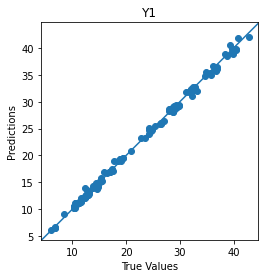

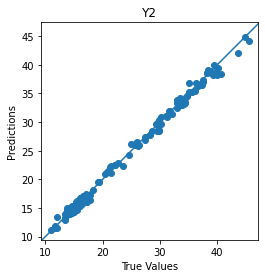

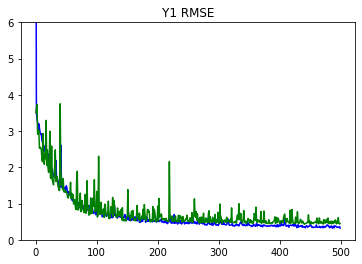

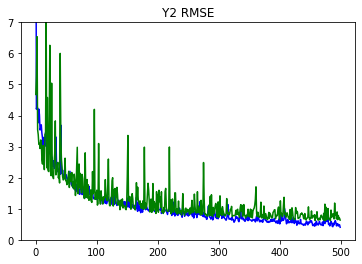

In [42]:
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)